This exercise use CSSEGISandData - Covid-19
you can see this [link](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# file_updated = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
confirmed_cases = pd.read_csv("datasets/2020-03-15_17-16-59_time_series_19-covid-Confirmed.csv")
deaths_cases = pd.read_csv("datasets/time_series_19-covid-Deaths.csv")
recovered_cases = pd.read_csv("datasets/time_series_19-covid-Recovered.csv")

In [4]:
confirmed_by_country = confirmed_cases.groupby("Country/Region").sum()

In [5]:
# Total Brazilian Cases
confirmed_by_country.loc["Brazil"][-1:]

3/21/20    1021.0
Name: Brazil, dtype: float64

In [6]:
# Total Chinese cases
confirmed_by_country.loc["China"][-1:]

3/21/20    81305.0
Name: China, dtype: float64

In [7]:
# Total Italian confirmed cases
confirmed_by_country.loc["Italy"][-1:]

3/21/20    53578.0
Name: Italy, dtype: float64

In [8]:
confirmed_by_country.loc["Korea, South"][-1]

8799.0

Text(0.5, 1.0, 'Confirmed cases in Brazil')

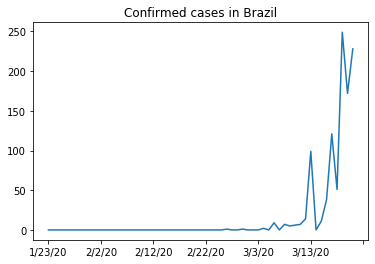

In [9]:
# Brazilian cases in a plot
confirmed_by_country.loc["Brazil"][2:].diff().dropna().plot()
plt.title("Confirmed cases in Brazil")

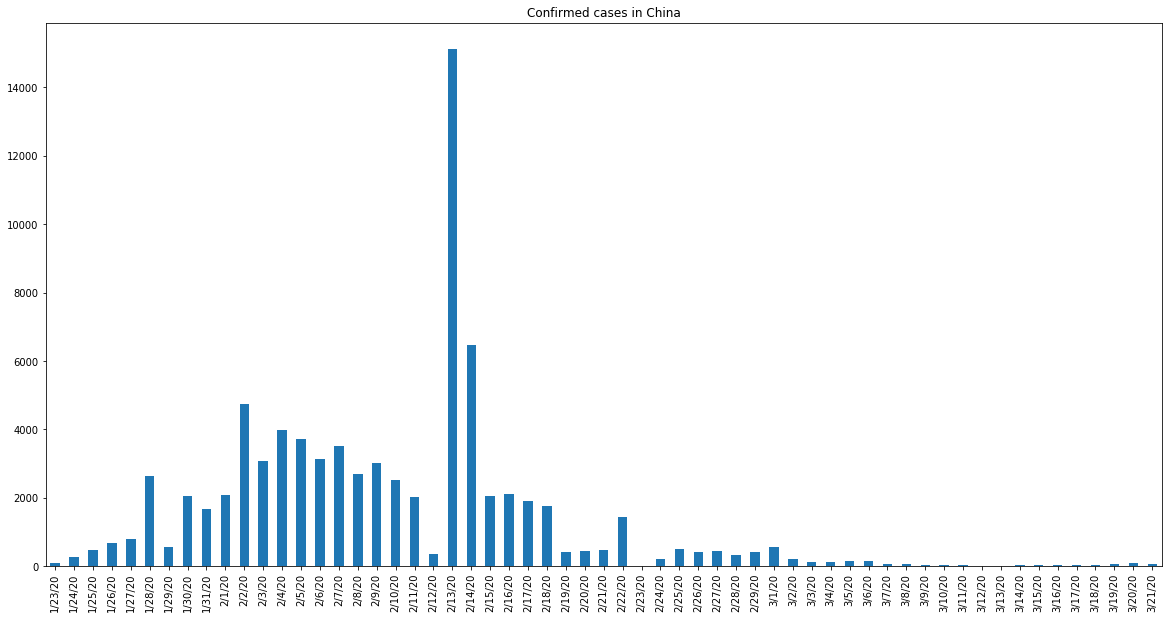

In [10]:
plt.figure(figsize=(20,10))
confirmed_by_country.loc["China"][2:].diff().dropna().plot(kind='bar')
plt.title("Confirmed cases in China")
plt.show()

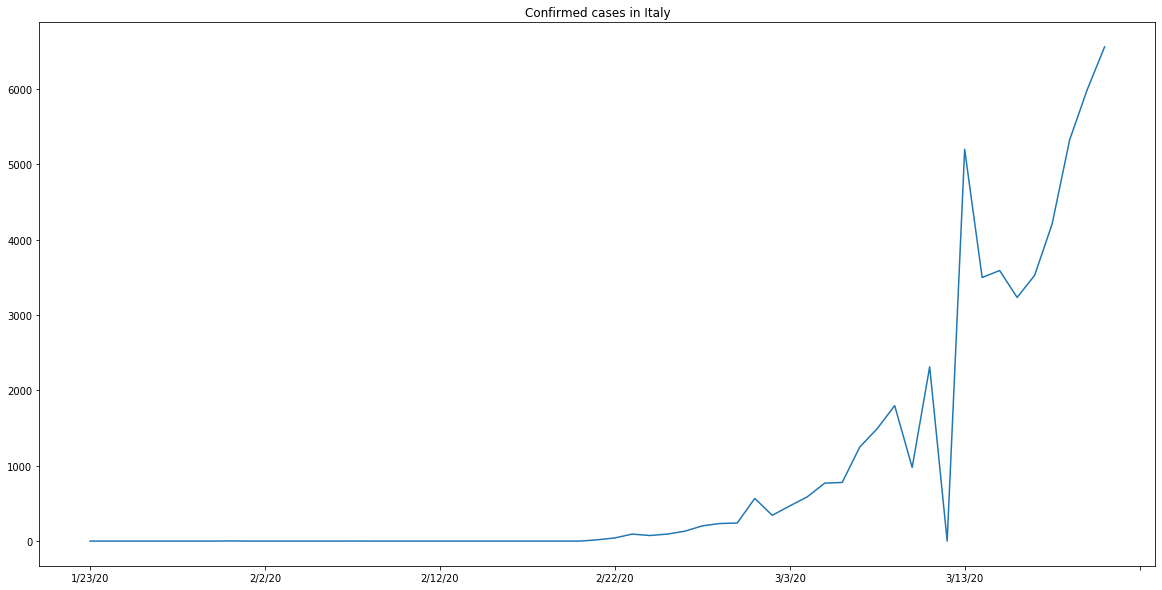

In [11]:
plt.figure(figsize=(20,10))
confirmed_by_country.loc["Italy"][2:].diff().dropna().plot()
plt.title("Confirmed cases in Italy")
# plt.ylim(5000)
plt.show()

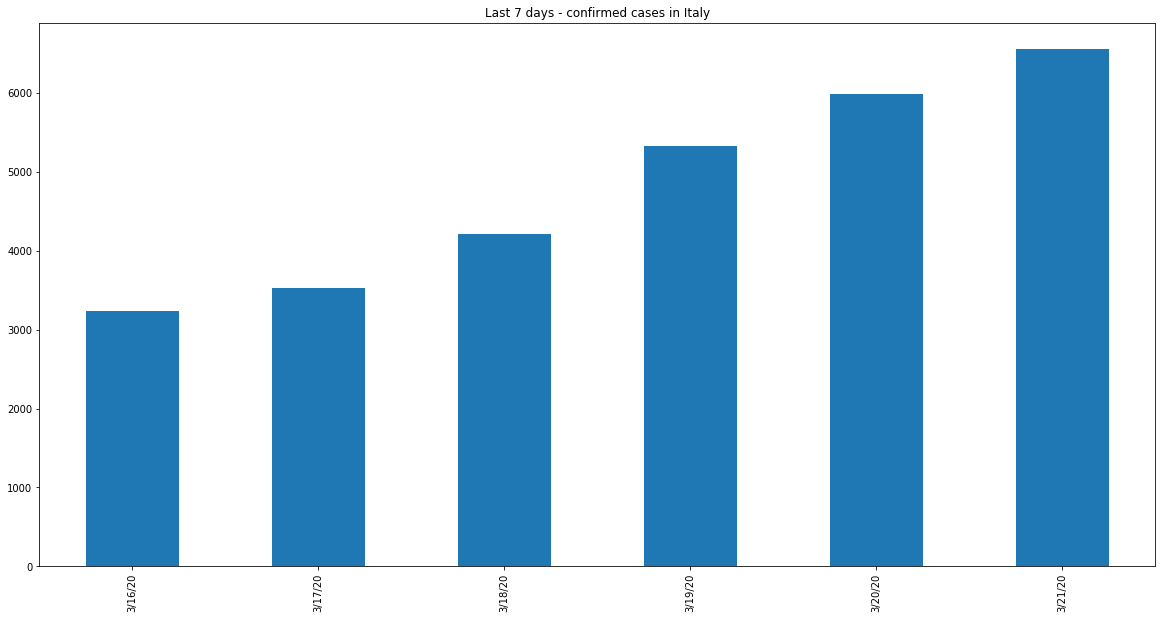

In [12]:
plt.figure(figsize=(20, 10))
confirmed_by_country.loc["Italy"][-7:].diff().dropna().plot(kind='bar')
plt.title("Last 7 days - confirmed cases in Italy")
plt.show()

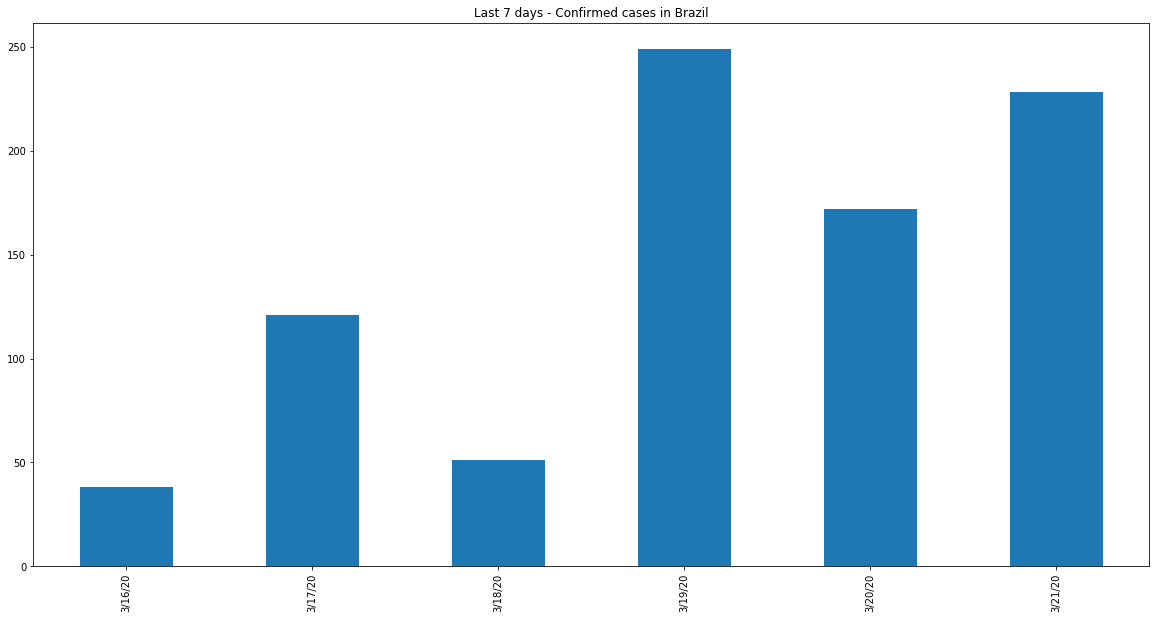

In [13]:
plt.figure(figsize=(20,10))
plt.title("Last 7 days - Confirmed cases in Brazil")
confirmed_by_country.loc["Brazil"][-7:].diff().dropna().plot(kind='bar')
plt.show()

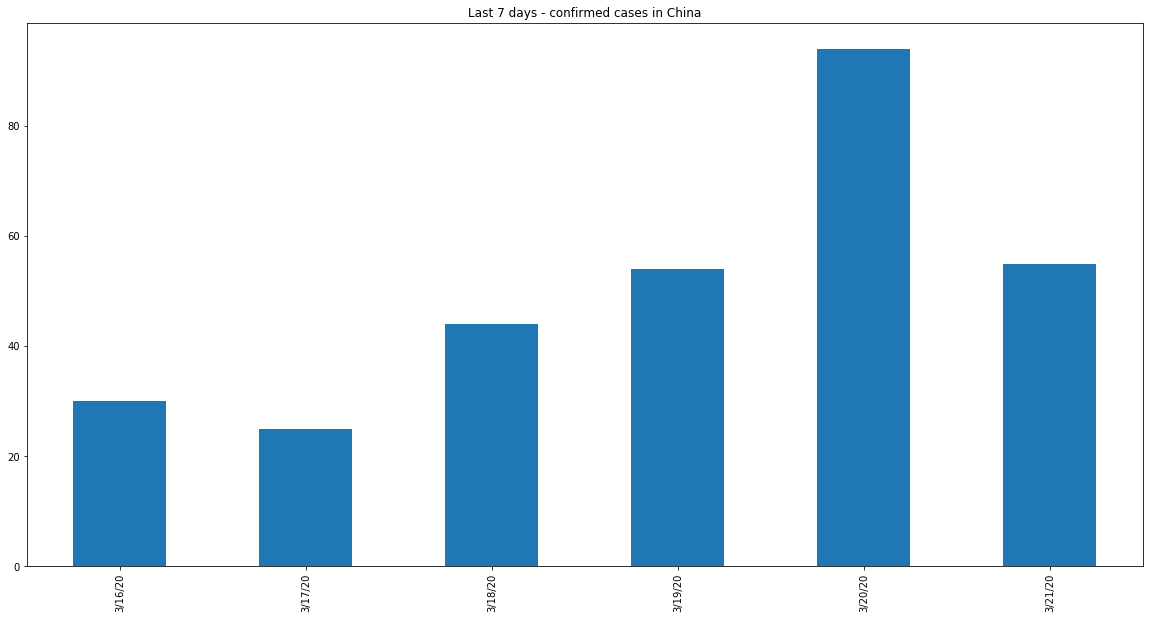

In [14]:
plt.figure(figsize=(20,10))
plt.title("Last 7 days - confirmed cases in China")
confirmed_by_country.loc["China"][-7:].diff().dropna().plot(kind='bar')
plt.show()

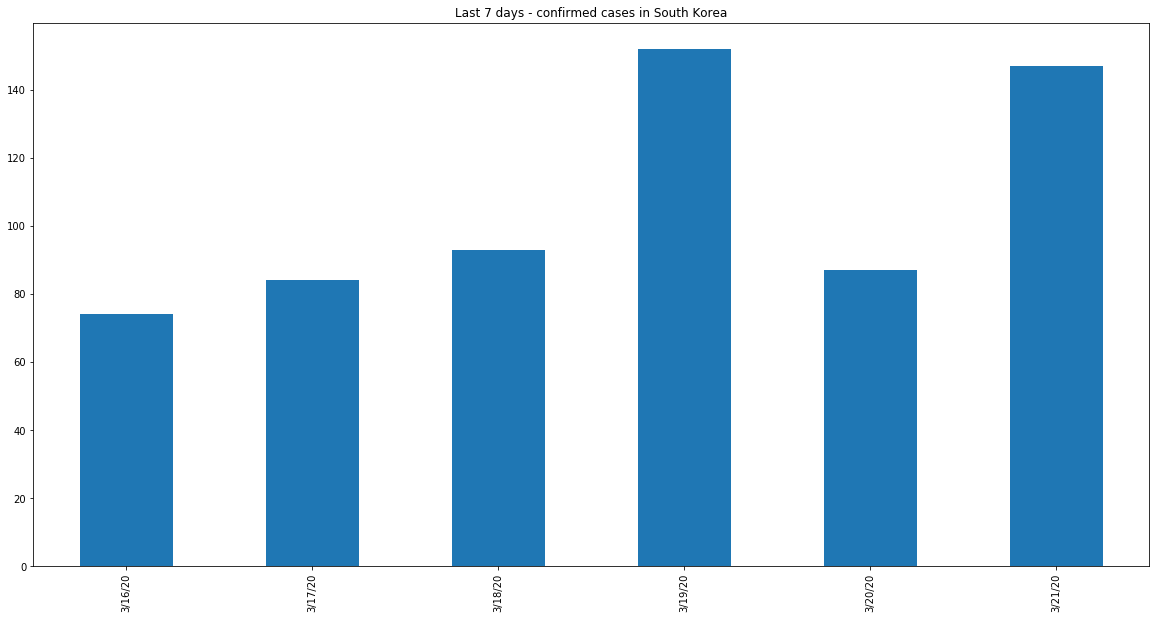

In [15]:
plt.figure(figsize=(20,10))
plt.title("Last 7 days - confirmed cases in South Korea")
confirmed_by_country.loc["Korea, South"][-7:].diff().dropna().plot(kind='bar')
plt.show()

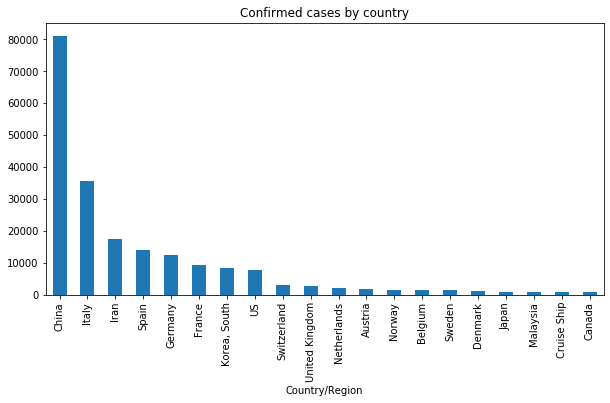

In [16]:
plt.figure(figsize=(10,5))
plt.title("Confirmed cases by country")
confirmed_by_country["3/18/20"].sort_values(ascending=False)[0:20].plot(kind='bar')
plt.show()

In [17]:
def latest_by_country(*argv):
    data = []
    for arg in argv:
        data.append(arg.groupby("Country/Region").sum().iloc[:,-1])
    return data

In [18]:
total_cases = pd.concat(
    latest_by_country(confirmed_cases, deaths_cases, recovered_cases),
    axis=1
)
total_cases.columns = ["confirmed", "deaths", "recovered"]

Letality rate in the world

In [19]:
sum_up = total_cases.sum()
global_letality_rate = (sum_up['deaths'] / sum_up['confirmed']) * 100

In [20]:
global_letality_rate

4.26009115866073

letality by country

In [21]:
total_cases['lethality'] = (total_cases['deaths'] / total_cases['confirmed']) * 100

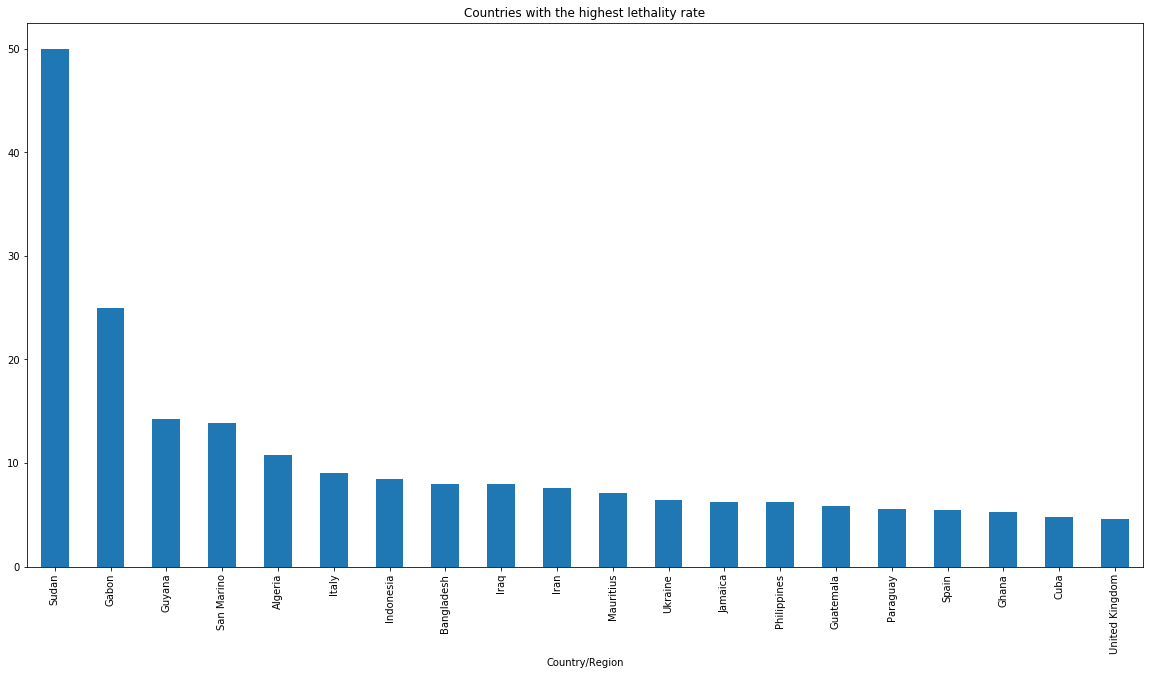

In [22]:
plt.figure(figsize=(20,10))
plt.title('Countries with the highest lethality rate')
total_cases['lethality'].sort_values(ascending=False)[:20].plot(kind='bar')
plt.show()

In [23]:
deaths_by_country = deaths_cases.groupby('Country/Region').sum()

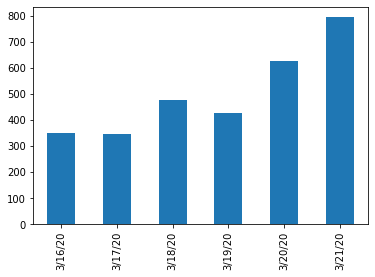

In [24]:
deaths_by_country.loc['Italy'][-7:].diff().dropna().plot(kind='bar')

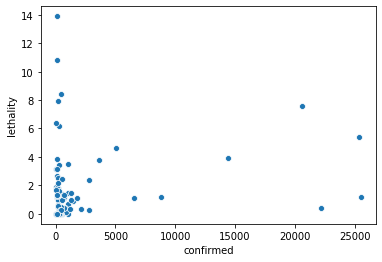

In [25]:
total_cases[['confirmed', 'lethality']]
sns.scatterplot(data=total_cases.query('confirmed > 40 and confirmed < 40000'), x='confirmed', y='lethality')

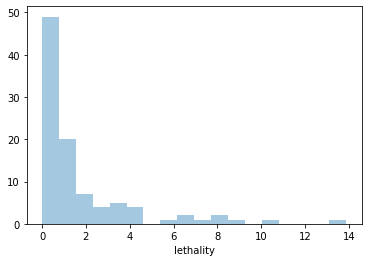

In [26]:
sns.distplot(total_cases.sort_values('lethality', ascending=False).query('confirmed > 40')['lethality'], kde=False)

In [37]:
df1 = pd.DataFrame(deaths_by_country.loc['Italy'][2:].diff().dropna())
df2 = pd.DataFrame(deaths_by_country.loc['China'][2:].diff().dropna())
df = pd.concat([df1, df2])
df

,Italy,China
1/23/20,0.0,NaN
1/24/20,0.0,NaN
1/25/20,0.0,NaN
1/26/20,0.0,NaN
1/27/20,0.0,NaN
...,...,...
3/17/20,NaN,13.0
3/18/20,NaN,11.0
3/19/20,NaN,8.0
3/20/20,NaN,4.0
